**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_r_kernel_local -p 8888:8888 -d palmoreck/jupyterlab_r_kernel:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_r_kernel_local
```


Documentación de la imagen de docker `palmoreck/jupyterlab_r_kernel:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/r_kernel).

---

Nota generada a partir de la [liga1](https://www.dropbox.com/s/jfrxanjls8kndjp/Diferenciacion_e_Integracion.pdf?dl=0), [liga2](https://www.dropbox.com/s/mmd1uzvwhdwsyiu/4.3.2.Teoria_de_convexidad_Funciones_convexas.pdf?dl=0) e inicio de [liga3](https://www.dropbox.com/s/ko86cce1olbtsbk/4.3.1.Teoria_de_convexidad_Conjuntos_convexos.pdf?dl=0).

# 1.4 Polinomios de Taylor y diferenciación numérica

## Problema: ¿Cómo aproximar una función $f$ en un punto $x_1$?

Si $f$ es continuamente diferenciable en $x_0$ y $f^{(1)}, f^{(2)}$ existen y están acotadas en $x_0$ entonces:

$$f(x_1) \approx f(x_0) + f^{(1)}(x_0)(x_1-x_0)$$

y se llama **aproximación de orden 1**. Ver final de esta nota para definición de continuidad, diferenciabilidad y propiedades

**Obs:** obsérvese que lo anterior requiere de los valores: $x_0, x_1, f(x_0), f^{(1)}(x_0)$. Esta aproximación tiene un error de **orden** $2$ pues su error es **proporcional** al cuadrado del ancho del intervalo: $h=x_1-x_0$, esto es, si reducimos a la mitad $h$ entonces el error se reduce en una cuarta parte.

Otra aproximación más simple sería:

$$f(x_1) \approx f(x_0)$$

lo cual sólo requiere del conocimiento de $f(x_0)$ y se llama aproximación de **orden** $0$, sin embargo esta aproximación tiene un error de **orden** $1$ pues este es proporcional a $h$ , esto es, al reducir a la mitad $h$ se reduce a la mitad el error.

Estos errores los llamamos errores por **truncamiento**. Utilizamos la notación "O grande" $\mathcal{O}(\cdot)$ para escribir lo anterior:

$$f(x)-f(x_0)=\mathcal{O}(h)$$

con la variable $h=x-x_0$. Análogamente:

$$f(x)-(f(x_0)+f^{(1)}(x_0)(x-x_0)) = \mathcal{O}(h^2).$$

**Obs:** no confundir órdenes de  una aproximación con órdenes de error.

Otras aproximaciones a una función se pueden realizar con:

* Interpoladores polinomiales (representación por Vandermonde, Newton, Lagrange).

## Aproximación a una función por el teorema de Taylor

En esta sección se presenta el teorema de Taylor, el cual, bajo ciertas hipótesis nos proporciona una expansión de una función alrededor de un punto. Este teorema será utilizado en **diferenciación e integración numérica**. El teorema es el siguiente:

Sea $f: \mathbb{R} \rightarrow \mathbb{R}$, $f \in \mathcal{C}^n([a,b])$ tal que $f^{(n+1)}$ existe en [a,b]. Si $x_0 \in [a,b]$ entonces $\forall x \in [a,b]$ se tiene: $f(x) = P_n(x) + R_n(x)$ donde: 

$$P_n(x) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)(x-x_0)^k}{k!} \quad (f^{(0)} = f)$$ y $$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$ con $\xi_x$ entre $x_0, x$ y $x_0$ se llama centro. Ver final de esta nota para definición del conjunto $\mathcal{C}^n([a,b])$.

**Comentarios:**

* El teorema de Taylor nos dice que cualquier función suave (función en $\mathcal{C}^n)$ se le puede aproximar por un polinomio en el intervalo $[a,b]$, de hecho $f(x) \approx P_n(x)$.

* El teorema de Taylor es una generalización del [teorema del valor medio para derivadas](https://en.wikipedia.org/wiki/Mean_value_theorem)

* $P_n(x)$ se le llama polinomio de Taylor alrededor de $x_0$ de orden $n$ y $R_n(x)$ es llamado residuo de Taylor alrededor de $x_0$ de orden $n+1$, tiene otras expresiones para representarlo y la que se utiliza en el enunciado anterior es en su forma de Lagrange (ver [liga](https://en.wikipedia.org/wiki/Taylor%27s_theorem) para otras expresiones del residuo).

* $\xi_x$ es un punto entre $x_0, x$ desconocido y está en función de $x$ (por eso se le escribe un subíndice).

* Una forma del teorema de Taylor es escribirlo definiendo a la variable $h=x-x_0$:

$$f(x) = f(x_0+h) = P_n(h) + R_n(h) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)h^k}{k!} + \frac{f^{(n+1)}(\xi_h)h^{n+1}}{(n+1)!}$$

y si $f^{(n+1)}$ es acotada, escribimos: $R_n(h) = \mathcal{O}(h^{n+1})$.


**Ejemplo: graficar la función y los polinomios de Taylor constante, lineal y cuadrático en una sola gráfica con `ggplot2` en el intervalo [1,2] para la función $\frac{1}{x}$ con centro en $x_0=1.5$. ¿Cuánto es la aproximación de los polinomios en x=1.9? (para esta pregunta calcula el error relativo de tus aproximaciones).**

Obtengamos los polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ y centro en $x_0=1.5$ para la función $\frac{1}{x}$ en el intervalo $[1,2]$. Los polinomios de Taylor son: 

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$

$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$

$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=6, repr.plot.height=6) #esta línea sólo se ejecuta para jupyterlab con R

In [3]:
Aprox_Taylor <- function(x,centro,n){
    length_x = length(x)
    evaluacion = rep(0,length_x)
    for(j in 1:length_x){
        constante = centro^(-1)
        evaluacion[j] = constante
        for(k in 1:n)
            constante = -1*centro^(-1)*(x[j]-centro)*constante
            evaluacion[j] = evaluacion[j]+(k+1)*constante
    }
    evaluacion
}

In [4]:
x0<-1.5
x<- seq(from=1,to=2,by=.005)
n<-c(0,1,2)
f<-function(z)1/z
y<-f(x)
y_Taylor_0<-1/x0*rep(1,length(x))
y_Taylor_1<-Aprox_Taylor(x,x0,1)
y_Taylor_2<-Aprox_Taylor(x,x0,2)

In [5]:
gg <- ggplot()

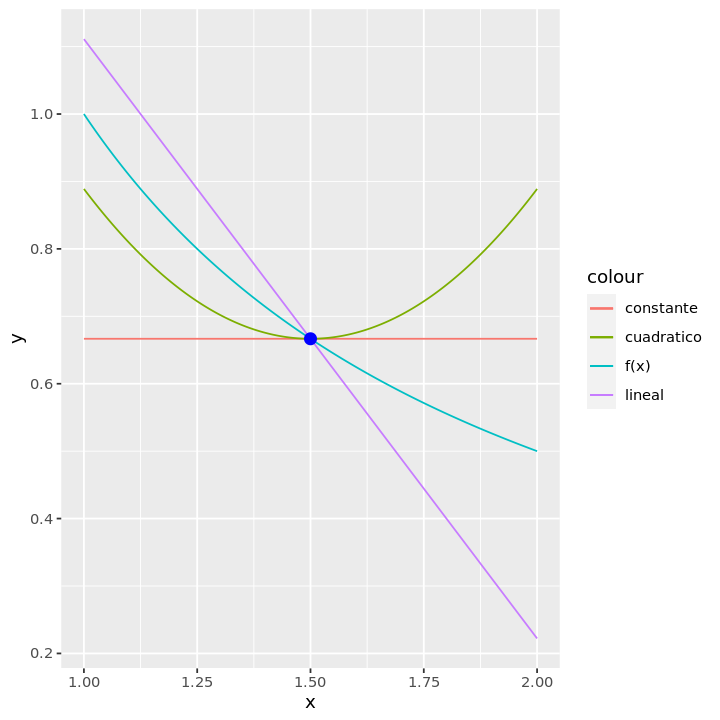

In [6]:
gg+
geom_line(aes(x=x,y=y,color='f(x)')) + 
geom_line(aes(x=x,y=y_Taylor_0,color='constante'))+
geom_line(aes(x=x,y=y_Taylor_1,color='lineal')) + 
geom_line(aes(x=x,y=y_Taylor_2,color='cuadratico')) + 
geom_point(aes(x=x0, y=f(x0)), color='blue',size=3)

In [7]:
err_relativo<-function(aprox,obj){
    abs(aprox-obj)/abs(obj)
}

In [8]:
x_obj=1.9
f_x_obj=f(x_obj)
print('error relativo polinomio constante')
err_relativo(1/x0,f_x_obj)
print('error relativo polinomio lineal')
err_relativo(Aprox_Taylor(x_obj,x0,1),f_x_obj)
print('error relativo polinomio cuadrático')
err_relativo(Aprox_Taylor(x_obj,x0,2),f_x_obj)

[1] "error relativo polinomio constante"


[1] 0.2666667

[1] "error relativo polinomio lineal"


[1] 0.4088889

[1] "error relativo polinomio cuadrático"


[1] 0.5368889

**Pregunta:** ¿por qué se tiene mejor aproximación con un polinomio constante o lineal que con un polinomio cuadrático? ¿no deberíamos tener menor error al añadir más y más términos en el polinomio de Taylor? ¿de qué depende tener una buena aproximación al utilizar polinomios de Taylor para una función $f$ en general?.

**Ejercicio:** Aproximar $f(1)$ con polinomios de Taylor de orden $0,1,2,3,4$ si $f(x)=-0.1x^4-0.15x^3-0.5x^2-0.25x+1.2$ con centro en $x0=0$. Calcula errores relativos de tus aproximaciones. Realiza las gráficas de cada polinomio en el intervalo $[0,1]$ con `ggplot2`. Observa que $R_5(x)$ es cero.

### Teorema de Taylor para una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$

Sea $f: \mathbb{R}^n \rightarrow \mathbb{R}$ diferenciable en $\text{dom}f$. Si $x_0, x \in \text{dom}f$ y $x_0+t(x-x_0) \in \text{dom}f, \forall t \in (0,1),$  entonces $\forall x \in \text{dom}f$ se tiene $f(x) = P_0(x) + R_0(x)$ donde:

$$P_0(x) = f(x_0)$$

$$R_0(x) = \nabla f(x_0+t_x(x-x_0))^T(x-x_0)$$

para alguna $t_x \in (0,1)$ y $\nabla f(\cdot)$ gradiente de $f$ (ver al final de esta nota la definición de gradiente). Esta se llama **aproximación de orden $0$** para $f$ con centro en $x_0$. Si $\nabla f(\cdot)$ es acotado en $\text{dom}f$ entonces se escribe: $R_0(x)=\mathcal{O}(||x-x_0||)$.

Si además $f$ es continuamente diferenciable en $\text{dom}f$(su derivada es continua, ver al final de esta nota definición de continuidad), $f^{(2)}$ existe en $\text{dom}f$, se tiene $f(x) = P_1(x) + R_1(x)$ donde:

$$P_1(x) = f(x_0) + \nabla f(x_0)^T(x-x_0)$$

$$R_1(x) = \frac{1}{2}(x-x_0)^T \nabla ^2f(x_0+t_x(x-x_0))(x-x_0)$$

para alguna $t_x \in (0,1)$ y $\nabla^2 f(\cdot)$ Hessiana de $f$ (ver al final de esta nota definición de la matriz Hessiana). Esta se llama **aproximación de orden $1$** para $f$ con centro en $x_0$. Si $\nabla^2f(\cdot)$ es acotada en $\text{dom}f$ entonces se escribe: $R_1(x) = \mathcal{O}(||x-x_0||^2)$.

Si $f^{(2)}$ es continuamente diferenciable y $f^{(3)}$ existe y es acotada en $\text{dom}f$, se tiene $f(x)=P_2(x) + R_2(x)$ donde:

$$P_2(x) = f(x_0) + \nabla f(x_0)^T(x-x_0) + \frac{1}{2}(x-x_0)^T \nabla ^2f(x_0)(x-x_0)$$

$$R_2(x)= \mathcal{O}(||x-x_0||^3).$$

Esta se llama **aproximación de orden $2$** para $f$ con centro en $x_0$. 

**Obs:** en este caso $f^{(3)}$ es un tensor.

**Comentarios:**

* Tomando $h=x-x_0$, se reescribe el teorema como sigue, por ejemplo para la aproximación de orden $1$ incluyendo su residuo:

$$f(x) = f(x_0 + h) = \underbrace{f(x_0) + \nabla f(x_0)^Th}_{\textstyle P_1(h)} + \underbrace{\frac{1}{2}h^T \nabla ^2f(x_0+t_xh)h}_{\textstyle R_1(h)}.$$

Si $f^{(2)}$ es acotada en $\text{dom}f$, escribimos: $R_1(h)=\mathcal{O}(||h||^2)$.

## Diferenciación numérica por diferencias finitas

Las fórmulas de aproximación a las derivadas por diferencias finitas pueden obtenerse con los polinomios de Taylor, presentes en el teorema del mismo autor, por ejemplo:

Sea $f \in \mathcal{C}^1([a,b])$ y $f^{(2)}$ existe y está acotada $\forall x \in [a,b]$ entonces, si $x+h \in [a,b]$ con $h>0$ por el teorema de Taylor:

$$f(x+h) = f(x) + f^{(1)}(x)h + f^{(2)}(\xi_{x+h})\frac{h^2}{2}$$ con $\xi_{x+h} \in [x,x+h]$ y al despejar $f^{(1)}(x)$ se tiene: 

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} - f^{(2)}(\xi_{x+h})\frac{h}{2}.$$

y escribimos:

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h).$$

La aproximación $\frac{f(x+h)-f(x)}{h}$ es una fórmula por diferencias hacia delante con error de orden $1$. Gráficamente se tiene:


<img src="https://dl.dropboxusercontent.com/s/r1ypkxkwa9g3pmk/dif_hacia_delante.png?dl=0" heigth="500" width="500">

Con las mismas suposiciones es posible obtener la fórmula para la aproximación por diferencias hacia atrás:

$$f^{(1)}(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{O}(h), h >0.$$


<img src="https://dl.dropboxusercontent.com/s/mxmc8kohurlu9sp/dif_hacia_atras.png?dl=0" heigth="500" width="500">

Considerando $f \in \mathcal{C}^2([a,b]), f^{(3)}$ existe y está acotada $\forall x \in [a,b]$ si $x-h, x+h \in [a,b]$ y $h>0$ entonces:

$$f^{(1)}(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2), h >0.$$

y el cociente $\frac{f(x+h)-f(x-h)}{2h}$ es la aproximación por diferencias centradas con error de orden $2$. Gráficamente:


<img src="https://dl.dropboxusercontent.com/s/jwi0y1t5z58pydz/dif_centradas.png?dl=0" heigth="500" width="500">

**Obs:** la aproximación por diferencias finitas a la primer derivada de la función tiene un error de orden $\mathcal{O}(h)$ por lo que una elección de $h$ igual a $.1 = 10^{-1}$ generará aproximaciones con alrededor de un dígito correcto.

**Obs:** la diferenciación numérica por diferencias finitas no es un proceso con una alta exactitud pues los problemas del redondeo de la aritmética en la máquina se hacen presentes en el mismo (ver nota [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)). Como ejemplo de esta situación realicemos el siguiente ejemplo.

**Ejemplo: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) con `ggplot2` para aproximar la primera derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(1)}(1) = -e^{-1}$**

In [9]:
f<-function(x){
    exp(-x)
}
aprox_1a_derivada<-function(f,x,h){
    (f(x+h)-f(x))/h
}

df<-function(x){
    -exp(-x)
}

err_absoluto<-function(aprox,obj){
    abs(aprox-obj)
}

err_relativo<-function(aprox,obj){
    abs(aprox-obj)/abs(obj)
}

x<-1

h<-10^(-1*(1:16))

err_absoluto_res<-err_absoluto(aprox_1a_derivada(f,x,h),df(x))
err_relativo_res<-err_relativo(aprox_1a_derivada(f,x,h),df(x))


gf<-ggplot()

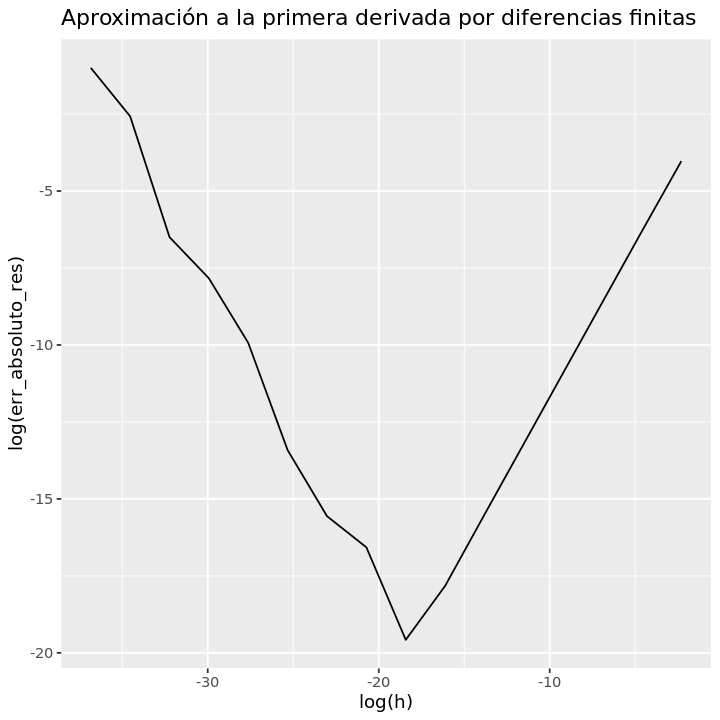

In [10]:
gf+
geom_line(aes(x=log(h),y=log(err_absoluto_res)))+
ggtitle('Aproximación a la primera derivada por diferencias finitas')

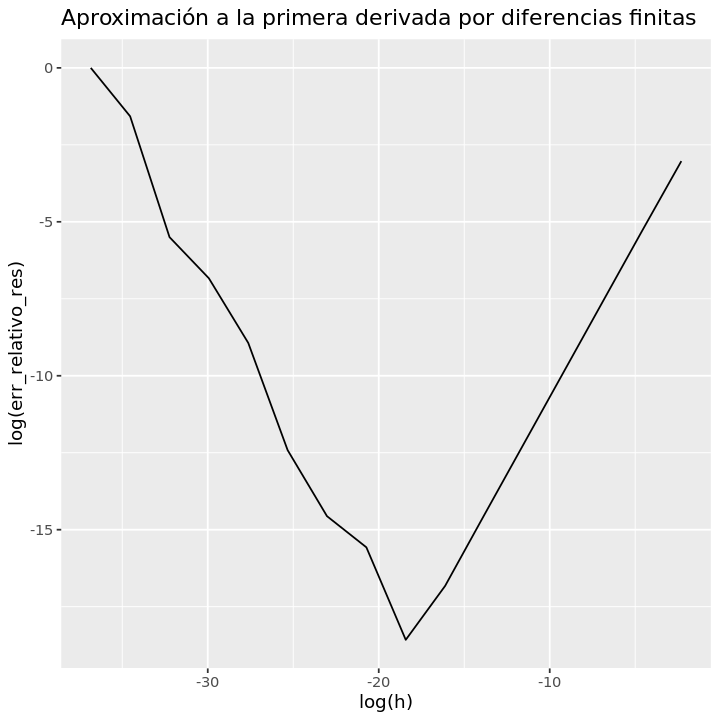

In [11]:
gf+
geom_line(aes(x=log(h),y=log(err_relativo_res)))+
ggtitle('Aproximación a la primera derivada por diferencias finitas')

**Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) con `ggplot2` para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$**. Usar:

$$\frac{d^2f(x)}{dx} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2} + \mathcal{O}(h)$$

**Encontrar valor(es) de $h$ que minimiza(n) al error absoluto y relativo.**

La aproximación anterior es una aproximación a la segunda derivada por diferencias hacia delante. Las versiones hacia atrás y centradas en general para una función $f: \mathbb{R} \rightarrow \mathbb{R}$ son respectivamente:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x)-2f(x-h)+f(x-2h)}{h^2} + \mathcal{O}(h)$$

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2} + \mathcal{O}(h^2)$$

### Análisis del error por redondeo y truncamiento en aproximación por diferencias finitas hacia delante

El ejemplo anterior muestra (vía una gráfica) que el método numérico de diferenciación numérica no es estable numéricamente respecto al redondeo (ver nota [1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo.ipynb) para definición de estabilidad de un algoritmo) y también se puede corroborar realizando un análisis del error. En esta sección consideramos la aproximación a la primer derivada por diferencias finitas hacia delante:

$$\frac{f(x+h)-f(x)}{h}$$

Suponemos que $\hat{f}(x)$ aproxima a $f(x)$ y por errores de redondeo $\hat{f}(x) = f(x)(1 + \epsilon_{f(x)})$ con $|\epsilon_{f(x)}| \leq \epsilon_{maq}$ error de redondeo al evaluar $f$ en $x$. $\hat{f}(x)$ es la aproximación en un SPFN (ver nota [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)). Además supóngase que $x,x+h,h \in \mathcal{Fl}$ . Entonces en la aproximación a la primer derivada por diferencias  hacia delante:

$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)$ y calculando el error absoluto:


$$\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right ) = \left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right | = \left | \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h) - \left ( \frac{f(x+h)(1+\epsilon_{f(x+h)})-f(x)(1+\epsilon_{f(x)})}{h} \right ) \right | =  \left |\mathcal{O}(h) - \frac{f(x+h)\epsilon_{f(x+h)}-f(x)\epsilon_{f(x)}}{h} \right | \leq \mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}$$

suponiendo en el último paso que $|f(x+h)\epsilon_{f(x+h)} - f(x)\epsilon_{f(x)}| \leq C \epsilon_{maq}$ con $C>0$ constante que acota a la función $f$ en el intervalo $[a,b]$. Obsérvese que $\frac{\hat{f}(x+h)-\hat{f}(x)}{h}$ es la aproximación a la primer derivada por diferencias hacia delante que se obtiene en la computadora, por lo que la cantidad $\left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right |$ es el error absoluto de la aproximación por diferencias hacia delante. 

El error relativo es:

$$\text{ErrRel}\left (\frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right) = \frac{\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right )}{|f^{(1)}(x)|} \leq \frac{\mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}}{|f^{(1)}(x)|} = K_1h + K_2\frac{1}{h}$$

con $K_1, K_2 >0$ constantes.

Entonces la función $g(h) = \mathcal{O}(h) + \mathcal{O}\left (\frac{1}{h} \right)$ acota al error absoluto y al error relativo y se tiene:

* Si $h \rightarrow 0$ la componente $\mathcal{O} \left ( \frac{1}{h} \right )$ domina a la componente $\mathcal{O}(h)$, la cual tiende a $0$.

* Si $h \rightarrow \infty$ la componente $\mathcal{O}(h)$ domina a $\mathcal{O} \left ( \frac{1}{h} \right )$, la cual tiende a $0$.

Por las dos observaciones anteriores, existe un valor de $h$ que minimiza a los errores. Tal valor se observa en las gráficas anteriores y es igual a:

In [12]:
print(c(h[which.min(err_absoluto_res)],h[which.min(err_relativo_res)]))

[1] 1e-08 1e-08


**Ejercicio:** obtener de forma analítica el valor de $h$ que minimiza la función $g(h)$ anterior. Tip: utilizar criterio de primera y segunda derivada para encontrar mínimo global.

**Conclusiones y comentarios:** 

* La componente $\mathcal{O}(h)$ es el error por truncamiento, la cual resulta del teorema de Taylor. El teorema de Taylor nos indica que añadir términos en el polinomio de Taylor si la $x$ a aproximar es cercana al centro, las derivadas de $f$ son acotadas y $h \rightarrow 0$ entonces el error por truncamiento debe tender a $0$. Lo anterior no ocurre en la implementación numérica (corroborado de forma analítica y visual) del método por diferenciación numérica para la primer derivada por la presencia de la componente $\mathcal{O}\left(\frac{1}{h}\right)$ en los errores. Tal componente proviene del error por redondeo.

* Obsérvese que el error relativo máximo es del $100\%$ lo que indica que no se tiene ninguna cifra correcta en la aproximación:


In [13]:
max(err_relativo_res)

[1] 1

y esto ocurre para un valor de $h$ igual a:

In [14]:
h[which.max(err_relativo_res)]

[1] 1e-16

**pregunta:** ¿por qué se alcanza el máximo error relativo en el valor de $h=10^{-16}$?.

Con esto se tiene que la diferenciación numérica es un método **inestable numéricamente respecto al redondeo**. Ver nota [1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo.ipynb).

* Un análisis de error similar se utiliza para el método de diferencias finitas por diferencias centradas para aproximar la primera derivada. En este caso el valor de $h$ que minimiza a los errores es del orden $h^* = 10^{-6}$.

### Diferenciación numérica para una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$

Supongamos $f$ es dos veces diferenciable en $\text{dom}f$. Si $f: \mathbb{R}^n \rightarrow \mathbb{R}$ entonces su derivada se llama **gradiente**, el cual es una función $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ y su segunda derivada se llama **Hessiana**, la cual es una función $f: \mathbb{R}^n \rightarrow \mathbb{R}^{n\times n}$ (ver final de esta nota para definición de derivadas en funciones $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$). Ambas funciones al evaluarse resultan en un vector en $\mathbb{R}^n$ y en una matriz en $\mathbb{R}^{n\times n}$ respectivamente. 

Podemos utilizar las fórmulas de aproximación en diferenciación numérica con diferencias finitas para el caso $f: \mathbb{R} \rightarrow \mathbb{R}$ revisadas anteriormente para aproximar al gradiente y a la Hessiana.

Para el caso del gradiente se tiene por **diferenciación hacia delante**:

$$\nabla f(x) = 
\begin{array}{l}
\left[ \begin{array}{c}
\frac{\partial f(x)}{\partial x_1}\\
\vdots\\
\frac{\partial f(x)}{\partial x_n}
\end{array}
\right] \approx, \nabla \hat{f}(x) =\left[ 
\begin{array}{c} 
\frac{f(x+he_1) - f(x)}{h}\\
\vdots\\
\frac{f(x+he_n) - f(x)}{h}
\end{array}
\right]
\end{array} \in \mathbb{R}^n$$

con $e_j$ $j$-ésimo vector canónico que tiene un número $1$ en la posición $j$ y $0$ en las entradas restantes para $j=1,\dots,n$. Se cumple $||\nabla f(x) - \nabla \hat{f}(x)|| = \mathcal{O}(h)$. Y para el caso de la Hessiana:

$$\nabla^2f(x) = \left[\begin{array}{cccc}
\frac{\partial^2f(x)}{\partial x_1^2} &\frac{\partial^2f(x)}{\partial x_2 \partial x_1}&\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_1}\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_2} &\frac{\partial^2f(x)}{\partial x_2^2} &\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_2}\\
\vdots &\vdots& \ddots&\vdots\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_n} &\frac{\partial^2f(x)}{\partial x_2 \partial x_n}&\dots&\frac{\partial^2f(x)}{\partial x_n^2} \\
\end{array}
\right],
$$


$$
\nabla^2 \hat{f}(x) = \left[\begin{array}{cccc}
\frac{f(x+2he_1)-2f(x+he_1)+f(x)}{h^2} &\frac{f(x+he_1+he_2)-f(x+he_1)-f(x+he_2)+f(x)}{h^2}&\dots&\frac{f(x+he_1+he_n)-f(x+he_1)-f(x+he_n)+f(x)}{h^2}\\
\frac{f(x+he_1+he_2)-f(x+he_2)-f(x+he_1)+f(x)}{h^2}&\frac{f(x+2he_2)-2f(x+he_2)+f(x)}{h^2}  &\dots&\frac{f(x+he_2+he_n)-f(x+he_2)-f(x+he_n)+f(x)}{h^2}\\
\vdots &\vdots& \ddots&\vdots\\
\frac{f(x+he_1+he_n)-f(x+he_n)-f(x+he_1)+f(x)}{h^2}&\frac{f(x+he_2+he_n)-f(x+he_n)-f(x+he_2)+f(x)}{h^2}&\dots&\frac{f(x+2he_n)-2f(x+he_n)+f(x)}{h^2}\\
\end{array}
\right]
$$

Se cumple: $||\nabla^2f(x)-\nabla\hat{f}^2(x)||=\mathcal{O}(h)$.

**Ejemplo:**

Aproximar $\nabla f(x), \nabla^2f(x)$ con diferencias hacia delante y $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ para $f: \mathbb{R}^4 \rightarrow \mathbb{R}$, dada por $f(x) = (x_1^2-x_2^2)^2+x_1^2+(x_3^2-x_4^2)^2+x_3^2$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. Realizar una gráfica de $\log($Err_rel) vs $\log($h)

Para esta función se tiene:


$$\nabla f(x) = 
\left[ \begin{array}{c}
4x_1(x_1^2-x_2^2) + 2x_1\\
-4x_2(x_1^2-x_2^2)\\
4x_3(x_3^2-x_4^2)+2x_3\\
-4x_4(x_3^2-x_4^2)
\end{array}
\right] ,
$$

$$\nabla^2f(x)=
 \left[\begin{array}{cccc}
12x_1^2-4x_2^2+2 &-8x_1x_2&0&0\\
-8x_1x_2 &-4x_1^2+12x_2^2&0&0\\
0 &0&12x_3^2-4x_4^2+2&-8x_3x_4\\
0&0&-8x_3x_4&-4x_3^2+12x_4^2\\
\end{array}
\right]
$$

Y evaluando en $x_0$:


In [15]:
#gradiente de f calculado de forma simbólica
gf<-function(x){
    c(4*x[1]*(x[1]^2-x[2]^2)+2*x[1],
      -4*x[2]*(x[1]^2-x[2]^2),
      4*x[3]*(x[3]^2-x[4]^2)+2*x[3],
      -4*x[4]*(x[3]^2-x[4]^2))
}

In [16]:
x_0<-c(1.5,1.5,1.5,1.5)

In [17]:
print(gf(x_0))

[1] 3 0 3 0


$$\nabla f(x_0) = 
\left[ \begin{array}{c}
3\\
0\\
3\\
0
\end{array}
\right],
$$

para la Hessiana:

In [18]:
#Hessiana de f calculada de forma simbólica
gf2<-function(x){
    matrix(c(12*x[1]^2-4*x[2]^2+2,-8*x[1]*x[2],0,0,
             -8*x[1]*x[2],-4*x[1]^2+12*x[2]^2,0,0,
             0,0,12*x[3]^2-4*x[4]^2+2,-8*x[3]*x[4],
             0,0,-8*x[3]*x[4],-4*x[3]^2+12*x[4]^2),nrow=4,ncol=4)
}

In [19]:
print(gf2(x_0))

     [,1] [,2] [,3] [,4]
[1,]   20  -18    0    0
[2,]  -18   18    0    0
[3,]    0    0   20  -18
[4,]    0    0  -18   18


$$\nabla^2f(x_0)=
 \left[\begin{array}{cccc}
20 &-18&0&0\\
-18&18&0&0\\
0 &0&20&-18\\
0&0&-18&18\\
\end{array}
\right]
$$

Calculando el gradiente y la Hessiana de forma numérica con la aproximación por diferencias hacia delante:

In [20]:
#definición de función y punto en el que se calculan las aproximaciones
f_ej<-function(x){
    (x[1]^2-x[2]^2)^2+x[1]^2+(x[3]^2-x[4]^2)^2+x[3]^2
}
x0<-rep(1.5,4)


In [21]:
#Función auxiliar para incrementar una entrada de un vector
#por una cantidad h
inc_index<-function(vec,index,h){
    vec[index]<-vec[index]+h
    vec}

In [22]:
#Función para aproximar el gradiente de f
#f: función a la que se le aproximará su gradiente
#x: punto en el que se aproximará el gradiente de f
#h: valor de h para diferencias hacia delante
#gf: aproximación al gradiente de f por diferencias hacia delante
gf_numeric<-function(f,x,h){
    n<-length(x)
    gf<-rep(0,n)
    for(i in 1:n){
        gf[i]=(f(inc_index(x,i,h))-f(x))
    }
    gf/h
}

In [23]:
#Función para aproximar la Hessiana de f
#f: función a la que se le aproximará su Hessiana
#x: punto en el que se aproximará la Hessiana de f
#h: valor de h para diferencias hacia delante
#Hf: aproximación a la Hessiana de f por diferencias hacia delante
gf2_numeric<-function(f,x,h){
    n<-length(x)
    Hf<-matrix(rep(0,n^2),nrow=n,ncol=n)
    f_x<-f(x)
    for(i in 1:n){
        x_inc_in_i<-inc_index(x,i,h)
        f_x_inc_in_i<-f(x_inc_in_i)
        for(j in i:n){
            #otra forma para dif:
            #dif<-f(inc_index(inc_index(x,j,h),i,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            dif<-f(inc_index(x_inc_in_i,j,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            Hf[i,j]<-dif
            if(j!=i)
                Hf[j,i]<-dif
        }
    }
    Hf/h^2
}

In [24]:
h<-10^(-1*(1:16))#un conjunto de valores de h para diferencias hacia delante
err_absoluto<-function(aprox,obj){
    norm(aprox-obj,"2") #cálculo de norma vectorial o matricial, depende de lo que recibe
                        #la función en sus parámetros aprox y obj
}

err_relativo<-function(aprox,obj){
    norm(aprox-obj,"2")/norm(obj,"2")#cálculo de norma vectorial o matricial, depende de lo que recibe
                                     #la función en sus parámetros aprox y obj
}

gf_numeric_list<-lapply(h,gf_numeric,f=f_ej,x=x0)
gf2_numeric_list<-lapply(h,gf2_numeric,f=f_ej,x=x0)


err_absoluto_gf_res<-sapply(gf_numeric_list,err_absoluto,obj=gf(x_0))
err_relativo_gf_res<-sapply(gf_numeric_list,err_relativo,obj=gf(x_0))

err_absoluto_gf2_res<-sapply(gf2_numeric_list,err_absoluto,obj=gf2(x_0))
err_relativo_gf2_res<-sapply(gf2_numeric_list,err_relativo,obj=gf2(x_0))

In [25]:
gg<-ggplot()

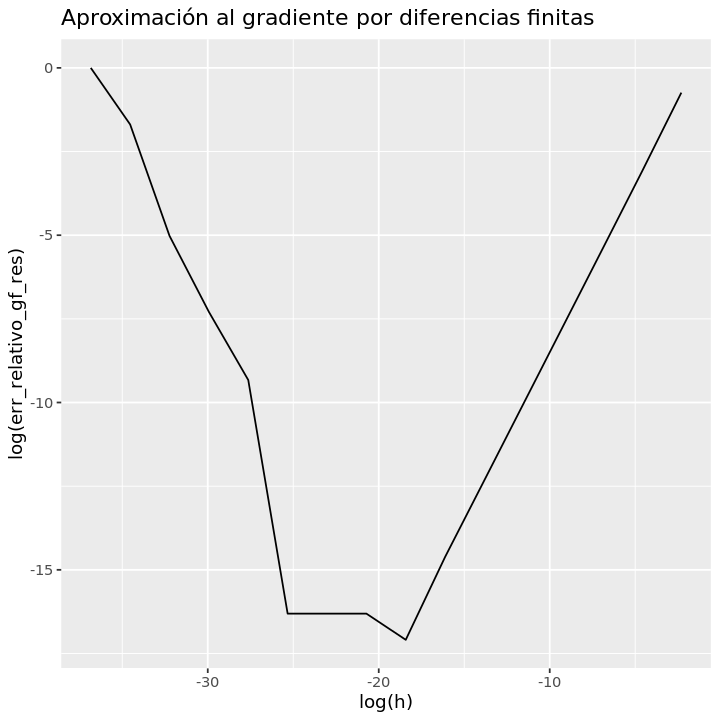

In [26]:
gg+
geom_line(aes(x=log(h),y=log(err_relativo_gf_res)))+
ggtitle('Aproximación al gradiente por diferencias finitas')

In [27]:
print(c(h[which.min(err_relativo_gf_res)],h[which.min(err_absoluto_gf_res)]))

[1] 1e-08 1e-08


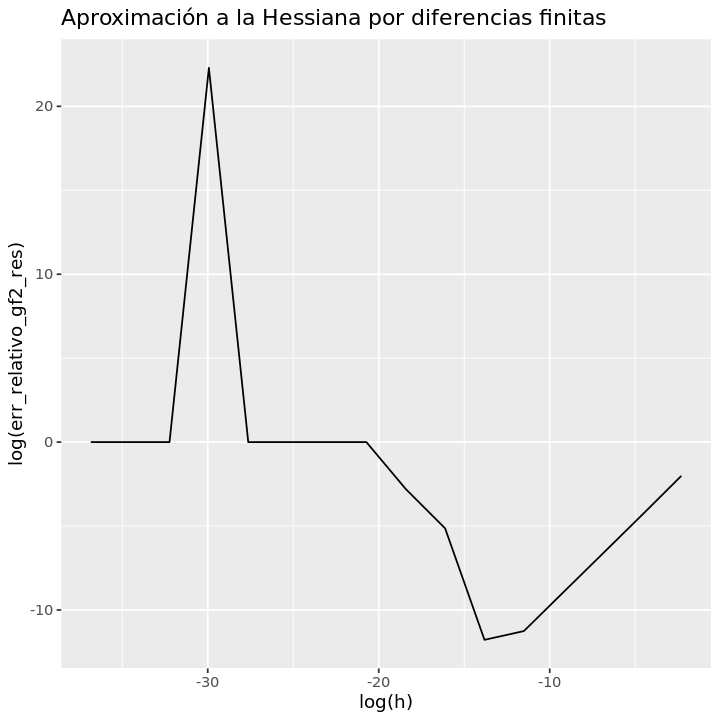

In [28]:
gg+
geom_line(aes(x=log(h),y=log(err_relativo_gf2_res)))+
ggtitle('Aproximación a la Hessiana por diferencias finitas')

In [29]:
print(c(h[which.min(err_relativo_gf2_res)],h[which.min(err_absoluto_gf2_res)]))

[1] 1e-06 1e-06


**Ejercicio: aproximar $\nabla f(x), \nabla^2f(x)$ con diferencias hacia delante y $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ para $f: \mathbb{R}^3 \rightarrow \mathbb{R}$, dada por $f(x) = x_1x_2\exp(x_1^2+x_3^2-5)$ en el punto $x_0=(1,3,-2)^T$ Realizar una gráfica de $\log($Err_rel) vs $\log($h).** 


---

## Definiciones utilizadas en el curso (algunas de ellas...)

Notación: $f: A \rightarrow B$ es una función de un conjunto $\text{dom}f \subseteq A$ en un conjunto $B$.

**Obs:** $\text{dom}f$ (el dominio de $f$) podría ser un subconjunto propio de $A$, esto es, algunos elementos de $A$ y otros no, son mapeados a elementos de $B$.

En lo que sigue se considera al espacio $\mathbb{R}^n$ y se asume que conjuntos y subconjuntos están en este espacio.

Un punto $x$ se nombra **punto límite** de un conjunto $X$, si existe una sucesión $\{x_k\} \subset X$ que converge a $x$. El conjunto de puntos límites se nombra **cerradura** o *closure* de $X$ y se denota como $\text{cl}X$. 

Un conjunto $X$ se nombra **cerrado** si es igual a su cerradura.

En lo siguiente $\text{intdom}f$ es el **interior**\* del dominio de $f$. 

\*El interior es el conjunto de **puntos interiores**: un punto $x$ de un conjunto $X$ se llama interior si existe una **vecindad** de $x$ (conjunto abierto\* que contiene a $x$) contenida en $X$.

\*Un conjunto $X$ se dice que es **abierto** si $\forall x \in X$ existe una bola abierta\* centrada en $x$ y contenida en $X$. Es equivalente escribir que $X$ es **abierto** si su complemento $\mathbb{R}^n \ X$ es cerrado.

\*Una **bola abierta** con radio $\epsilon>0$ y centrada en $x$ es el conjunto: $B_\epsilon(x) =\{y \in \mathbb{R}^n : ||y-x|| < \epsilon\}$.



**Continuidad**

$f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ es continua en $x \in \text{dom}f$ si $\forall \epsilon >0 \exists \delta > 0 $ tal que:

$$y \in \text{dom}f, ||y-x||_2 \leq \delta \implies ||f(y)-f(x)||_2 \leq \epsilon$$

**Obs:** 

* $f$ continua en un punto $x$ del dominio de $f$ entonces $f(y)$ es arbitrariamente cercana a $f(x)$ para $y$ en el dominio de $f$ cercana a $x$.

* Otra forma de definir que $f$ sea continua en $x \in \text{dom}f$ es con sucesiones y límites: si $\{x_i\}_{i \in \mathbb{N}} \subseteq \text{dom}f$ es una sucesión de puntos en el dominio de $f$ que converge a $x \in \text{dom}f$, $\displaystyle \lim_{i \rightarrow \infty}x_i = x$, y $f$ es continua en $x$ entonces la sucesión $\{f(x_i)\}_{i \in \mathbb{N}}$ converge a $f(x)$: $\displaystyle \lim_{i \rightarrow \infty}f(x_i) = f(x) = f \left(\displaystyle \lim_{i \rightarrow \infty} x_i \right )$.

**Notación:** $\mathcal{C}([a,b])=\{\text{funciones } f:\mathbb{R} \rightarrow \mathbb{R} \text{ continuas en el intervalo [a,b]}\}$ y $\mathcal{C}(\text{dom}f) = \{\text{funciones } f:\mathbb{R}^n \rightarrow \mathbb{R}^m \text{ continuas en su dominio}\}$.

### Función Diferenciable

### Caso $f: \mathbb{R} \rightarrow \mathbb{R}$

$f$ es diferenciable en $x_0 \in (a,b)$ si $\displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}$ existe y escribimos:

$$f^{(1)}(x_0) = \displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}.$$

$f$ es diferenciable en $[a,b]$ si es diferenciable en cada punto de $[a,b]$. Análogamente definiendo la variable $h=x-x_0$ se tiene:


$f^{(1)}(x_0) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$ que típicamente se escribe como:

$$f^{(1)}(x) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}.$$

**Comentario:** si $f$ es diferenciable en $x_0$ entonces $f(x) \approx f(x_0) + f^{(1)}(x_0)(x-x_0)$. Gráficamente:

<img src="https://dl.dropboxusercontent.com/s/3t13ku6pk1pjwxo/f_diferenciable.png?dl=0" heigth="500" width="500">



**Notación:** $\mathcal{C}^n([a,b])=\{\text{funciones } f:\mathbb{R} \rightarrow \mathbb{R} \text{ con } n \text{ derivadas continuas en el intervalo [a,b]}\}$.

### Caso $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$

$f$ es diferenciable en $x \in \text{intdom}f$ si existe una matriz $Df(x) \in \mathbb{R}^{m\times n}$ tal que:

$$\displaystyle \lim_{z \rightarrow x, z \neq x} \frac{||f(z)-f(x)-Df(x)(z-x)||_2}{||z-x||_2} = 0, z \in \text{dom}f$$

en este caso $Df(x)$ se llama la derivada de $f$ en $x$.

**Obs:** sólo puede existir a lo más una matriz que satisfaga el límite anterior.

**Comentarios:**

* $Df(x)$ también es llamada la **Jacobiana** de $f$.

* Se dice que $f$ es diferenciable si $\text{dom}f$ es abierto y es diferenciable en cada punto de $domf.$

* La función: $f(x) + Df(x)(z-x)$ es afín y se le llama **aproximación de orden $1$** de $f$ en $x$ (o también cerca de $x$). Para $z$ cercana a $x$ ésta aproximación es cercana a $f(z)$.

* $Df(x)$ puede encontrarse con la definición de límite anterior o con las derivadas parciales: $Df(x)_{ij} = \frac{\partial f_i(x)}{\partial x_j}, i=1,\dots,m, j=1,\dots,n$ definidas como:

$$\frac{\partial f_i(x)}{\partial x_j} = \displaystyle \lim_{h \rightarrow 0} \frac{f_i(x+he_j)-f_i(x)}{h}$$

donde: $f_i : \mathbb{R}^n \rightarrow \mathbb{R}$, $i=1,\dots,m,j=1,\dots,n$ y $e_j$ $j$-ésimo vector canónico que tiene un número $1$ en la posición $j$ y $0$ en las entradas restantes.

* Si $f: \mathbb{R}^n \rightarrow \mathbb{R}, Df(x) \in \mathbb{R}^{1\times n}$, su transpuesta se llama **gradiente**, el cual es un vector columna, se denota $\nabla f(x)$ y sus componentes son derivadas parciales: 

$$\nabla f(x) = Df(x)^T = 
    \left[ \begin{array}{c}
    \frac{\partial f(x)}{\partial x_1}\\
    \vdots\\
    \frac{\partial f(x)}{\partial x_n}
    \end{array}
    \right] = \left[ 
    \begin{array}{c} 
    \displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_1) - f(x)}{h}\\
    \vdots\\
    \displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_n) - f(x)}{h}
    \end{array}
    \right] \in \mathbb{R}^{n\times 1}.$$


**Comentarios:** 

* En este contexto, la aproximación de primer orden a $f$ en $x$ es: $f(x) + \nabla f(x)^T(z-x)$ para $z$ cercana a $x$.

* $\mathcal{C}^n(\text{dom}f) = \{\text{funciones } f:\mathbb{R}^n \rightarrow \mathbb{R}^m \text{ con } n \text{ derivadas continuas en su dominio}\}$.

### Regla de la cadena

Si $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ es diferenciable en $x\in \text{intdom}f$ y $g:\mathbb{R}^m \rightarrow \mathbb{R}^p$ es diferenciable en $f(x)\in \text{intdom}g$, se define la composición $h:\mathbb{R}^n \rightarrow \mathbb{R}^p$ por $h(z) = g(f(z))$, la cual es diferenciable en $x$, con derivada:

$$Dh(x)=Dg(f(x))Df(x)\in \mathbb{R}^{p\times n}.$$

**Ejemplo:** Sean $g:\mathbb{R} \rightarrow \mathbb{R}$, $f:\mathbb{R}^n \rightarrow \mathbb{R}$, $h:\mathbb{R}^n \rightarrow \mathbb{R}$ con $h(z) = g(f(z))$ entonces: 

$$Dh(x) = Dg(f(x))Df(x) = \frac{dg(f(x))}{dx}(\nabla f(x))^T \in \mathbb{R}^{1\times n}$$

y la transpuesta de $Dh(x)$ es: $\nabla h(x) = (Dh(x))^T = \frac{dg(f(x))}{dx} \nabla f(x) \in \mathbb{R}^{n\times 1}$.

### Caso particular:

Si $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$, $f(x) = Ax +b$ con $A \in \mathbb{R}^{m\times n},b \in \mathbb{R}^m$, $g:\mathbb{R}^m \rightarrow \mathbb{R}^p$ y $h(z)=g(f(z))=g(Az+b)$ con $\text{dom}h=\{x \in \mathbb{R}^n | Ax+b \in \text{dom}g\}$ entonces la derivada de $h$ en $x$ es: $Dh(x) = Dg(f(x))Df(x)=Dg(Ax+b)A$

**Obs:** Si $f:\mathbb{R}^n \rightarrow \mathbb{R}^m, g:\mathbb{R}^m \rightarrow \mathbb{R}, h:\mathbb{R}^n \rightarrow \mathbb{R}$ entonces: $\nabla h(x) = (Dh(x))^T = A^T(Dg(Ax+b))^T=A^T\nabla g(Ax+b) \in \mathbb{R}^{n\times 1}$.

**Ejemplo:**

1) Sean $g:\mathbb{R}^n \rightarrow \mathbb{R}, x, v \in \mathbb{R}^n$ y $\hat{g}: \mathbb{R} \rightarrow \mathbb{R}$ con $\hat{g}(t)=g(x+tv)$, esto es, $\hat{g}$ es $g$ restringida a la línea $\{x+tv |t \in \mathbb{R} \}$, entonces:

$$(\nabla \hat{g}(t))^T = D\hat{g}(t) = \hat{g}^{(1)}(t) = (\nabla g(x+tv))^Tv.$$

**Comentario:** el escalar $\hat{g}^{(1)}(0) = (\nabla g(x))^Tv$ se llama **derivada direccional** de $g$ en $x$ en la dirección $v$.

2) Sea $h: \mathbb{R}^n \rightarrow \mathbb{R}, h(x) = \log \left( \displaystyle \sum_{i=1}^m \exp(a_i^Tx+b_i) \right)$ con $x\in \mathbb{R}^n,a_i\in \mathbb{R}^n \forall i=1,\dots,m$ y $b_i \in \mathbb{R} \forall i=1,\dots,m$ entonces: $Dh(x)=Dg(f(x))Df(x)$ con $g: \mathbb{R}^m \rightarrow \mathbb{R}$ dada por $g(y)=\log \left( \displaystyle \sum_{i=1}^m \exp(y_i) \right ), f(x)=Ax+b, A=(a_i)_{i=1}^m \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^m.$ y $h(x)=g(f(x))$. Entonces:

$$
Dh(x)=\left(\displaystyle \sum_{i=1}^m\exp(a_i^Tx+b_i) \right)^{-1}\left[ \begin{array}{c}
    \exp(a_1^Tx+b_1)\\
    \vdots\\
    \exp(a_m^Tx+b_m)
    \end{array}
    \right]A=(1^Tz)^{-1}z^TA
$$

donde: $z=\left[ \begin{array}{c}
    \exp(a_1^Tx+b_1)\\
    \vdots\\
    \exp(a_m^Tx+b_m)
    \end{array}\right]$. Por lo tanto $\nabla h(x) = (1^Tz)^{-1}A^Tz$.

### Segunda derivada de una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

Sea $f:\mathbb{R}^n \rightarrow \mathbb{R}$. La segunda derivada o matriz **Hessiana** de $f$ en $x \in \text{intdom}f$ existe si $f$ es dos veces diferenciable en $x$, se denota $\nabla^2f(x)$ y sus componentes son segundas derivadas parciales:

$$\nabla^2f(x) = \left[\begin{array}{cccc}
\frac{\partial^2f(x)}{\partial x_1^2} &\frac{\partial^2f(x)}{\partial x_2 \partial x_1}&\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_1}\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_2} &\frac{\partial^2f(x)}{\partial x_2^2} &\dots&\frac{\partial^2f(x)}{\partial x_n \partial x_2}\\
\vdots &\vdots& \ddots&\vdots\\
\frac{\partial^2f(x)}{\partial x_1 \partial x_n} &\frac{\partial^2f(x)}{\partial x_2 \partial x_n}&\dots&\frac{\partial^2f(x)}{\partial x_n^2} \\
\end{array}
\right]
$$

**Comentarios:**

* La aproximación de segundo orden a $f$ en $x$ (o también para puntos cercanos a $x$) es la función cuadrática:

$$f(x) + (\nabla f(x))^T(z-x)+\frac{1}{2}(z-x)^T\nabla^2f(x)(z-x)$$

la cual es una función de $z$.

* Se cumple:

$$\displaystyle \lim_{z \rightarrow x, z \neq x} \frac{|f(z)-[f(x)+(\nabla f(x))^T(z-x)+\frac{1}{2}(z-x)^T\nabla^2f(x)(z-x)]|}{||z-x||_2} = 0, z \in \text{dom}f$$

* Se tiene lo siguiente:

    * $\nabla f$ es una función llamada gradient mapping (o simplemente gradiente).

    * $\nabla f:\mathbb{R}^n \rightarrow \mathbb{R}^n$ tiene regla de correspondencia $\nabla f(x)$ (evaluar en $x$ la matriz $(Df(\cdot))^T$).

    * Si $f$ es dos veces diferenciable entonces: $D\nabla f(x) = \nabla^2f(x)$.
    
    * **Importante:** si $f \in \mathcal{C}^2(\text{dom}f)$ entonces la Hessiana es una matriz simétrica.

### Regla de la cadena para la segunda derivada

**Caso 1:** Sean $f:\mathbb{R}^n \rightarrow \mathbb{R}, g:\mathbb{R} \rightarrow \mathbb{R}, h:\mathbb{R}^n \rightarrow \mathbb{R}$ con  $h(x) = g(f(x))$, entonces: $\nabla^2h(x) = D\nabla h(x)$ y $\nabla h(x)=(Dh(x))^T = (Dg(f(x))Df(x))^T=\frac{dg(x)}{dx}\nabla f(x)$ por lo que:

$\nabla^2 h(x) = D\nabla h(x)=D \left(\frac{dg(f(x))}{dx}\nabla f(x)\right) = \frac{dg(f(x))}{dx}\nabla^2 f(x)+\left(\frac{d^2g(f(x))}{dx}\nabla f(x) (\nabla f(x))^T \right)^T=\frac{dg(f(x))}{dx}\nabla^2 f(x)+\frac{d^2g(f(x))}{dx} \nabla f(x) (\nabla f(x))^T$


**Caso 2:** Sean $f:\mathbb{R}^n \rightarrow \mathbb{R}^m, f(x) = Ax+b, A \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^m$ y $h(x) = g(f(x))$ con $g:\mathbb{R}^m \rightarrow \mathbb{R}^p, h:\mathbb{R}^n \rightarrow \mathbb{R}^p$, entonces:



$$\nabla h(x) = (Dh(x))^T = (Dg(f(x))Df(x))^T = (Dg(Ax+b)A)^T = A^TDg(Ax+b).$$

**Obs:** si $p=1$ se tiene: $\nabla^2h(x) = D \nabla h(x) = A^T \nabla^2g(Ax+b)A.$

**Ejemplos:**

* Sea $\hat{g}(t) = g(x+tv)$ con $x,v \in \mathbb{R}^n, t \in \mathbb{R}$ y $g:\mathbb{R}^n \rightarrow \mathbb{R}$, $\hat{g}: \mathbb{R} \rightarrow \mathbb{R}$ es decir, $\hat{g}$ es $g$ restringida a la línea $\{x+tv|t \in \mathbb{R}\}$, entonces:

$$(\nabla \hat{g}(t))^T = D\hat{g}(t) = \frac{\hat{g}(t)}{dt} = Dg(x+tv)v = \nabla g(x+tv)^Tv$$

y:

$$\nabla^2 \hat{g}(t) = \frac{d^2\hat{g}(t)}{dt^2} = D\nabla g(x+tv)v=v^T\nabla^2g(x+tv)v.$$

* Sean $h: \mathbb{R}^n \rightarrow \mathbb{R}, h(x) = \log \left( \displaystyle \sum_{i=1}^m \exp(a_i^Tx+b_i)\right)$ con $x \in \mathbb{R}^n, a_i \in \mathbb{R}^n \forall i=1,\dots,m$ y $b_i \in \mathbb{R} \forall i=1,\dots,m$. Entonces: $Dh(x)=Dg(f(x))Df(x)$ con $g(y) = \log \left( \displaystyle \sum_{i=1}^m \exp(y_i)\right ), f(x) = Ax+b, A=(a_i)_{i=1}^m \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^m, h(x) = g(f(x))$.

Como se desarrolló anteriormente $\nabla h(x) = (1^Tz)^{-1}A^Tz$ con $z=\left[ \begin{array}{c}
    \exp(a_1^Tx+b_1)\\
    \vdots\\
    \exp(a_m^Tx+b_m)
    \end{array}\right]$.

$$\therefore \nabla^2 h(x) = D\nabla h(x) = A^T \nabla^2g(Ax+b)A\text{ (por caso }2)$$ 

donde: $\nabla^2g(y)=(1^Ty)^{-1}\text{diag}(y)-(1^Ty)^{-2}yy^T $ (por caso $1$ tomando $\log:\mathbb{R} \rightarrow \mathbb{R}, \sum \exp: \mathbb{R}^m \rightarrow \mathbb{R}$)
    
    

$$\therefore  \nabla^2 h(x) = A^T\left[(1^Tz)^{-1}\text{diag}(z)-(1^Tz)^{-2}zz^T \right]A$$

con $\text{diag}(c)$ matriz diagonal con elementos en su diagonal iguales a las entradas del vector $c$.

**Ejercicios**

1. Resuelve los ejercicios y preguntas de la nota.



**Referencias**

1. R. L. Burden, J. D. Faires, Numerical Analysis, Brooks/Cole Cengage Learning, 2005.

2. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

3. S. P. Boyd, L. Vandenberghe, Convex Optimization. Cambridge University Press, 2004.

4. Nota [1.2.Sistema de punto flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb).

5. Nota [1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo.ipynb).
